# Yahoo API practice

!pip install yfinance

In [2]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#import randomness 

In [3]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
GetFacebookInformation = yahooFinance.Ticker("META")
GetAmazonInformation = yahooFinance.Ticker("AMZN")
GetGoogleInformation = yahooFinance.Ticker("GOOGL")

# whole python dictionary is printed here
print(GetFacebookInformation.info)

# for key, value in GetFacebookInformation.info.items():
#     print(key, ":", value)

{'address1': '1 Meta Way', 'city': 'Menlo Park', 'state': 'CA', 'zip': '94025', 'country': 'United States', 'phone': '650 543 4800', 'website': 'https://investor.atmeta.com', 'industry': 'Internet Content & Information', 'industryKey': 'internet-content-information', 'industryDisp': 'Internet Content & Information', 'sector': 'Communication Services', 'sectorKey': 'communication-services', 'sectorDisp': 'Communication Services', 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality and mixed reality headsets, augmented reality, and wearables worldwide. It operates through two segments, Family of Apps (FoA) and Reality Labs (RL). The FoA segment offers Facebook, which enables people to build community through feed, reels, stories, groups, marketplace, and other; Instagram that brings people closer through instagram feed, stories, reels

In [4]:
facebook_data=GetFacebookInformation.history(period="max")
facebook_data.head(3) #pandas dataframe
facebook_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-27 00:00:00-04:00,601.250000,614.250000,600.099976,609.613525,4489278,0.0,0.0
2025-03-26 00:00:00-04:00,624.890015,626.750000,606.609985,610.979980,12609800,0.0,0.0
2025-03-25 00:00:00-04:00,626.760010,633.880005,621.179993,626.309998,15312500,0.0,0.0


In [5]:
amazon_data=GetAmazonInformation.history(period="max")
amazon_data.head(3)
amazon_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-27 00:00:00-04:00,200.875000,203.789993,199.282104,202.384995,10445290,0.0,0.0
2025-03-26 00:00:00-04:00,205.839996,206.009995,199.929993,201.130005,32855300,0.0,0.0
2025-03-25 00:00:00-04:00,203.600006,206.210007,203.220001,205.710007,31171200,0.0,0.0


In [6]:
google_data=GetGoogleInformation.history(period="max")
google_data.head(3)
google_data.sort_values("Date", ascending=False).head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-27 00:00:00-04:00,164.639999,165.410004,163.610001,163.679993,7674682,0.0,0.0
2025-03-26 00:00:00-04:00,169.000000,169.610001,164.839996,165.059998,28901600,0.0,0.0
2025-03-25 00:00:00-04:00,168.979996,170.630005,168.320007,170.559998,24174400,0.0,0.0


In [7]:
google_data['Open'].sum()
google_data['Open'].mean()

49.18098826048975

numpy random
np.random.normal
https://www.geeksforgeeks.org/get-financial-data-from-yahoo-finance-with-python/

### Pick any 3 stocks of your choice and pull the data from yahoo finance. Compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min).

In [8]:
average_price = facebook_data[['Open', 'High', 'Low', 'Close']].mean(axis=1).mean()
print(average_price)

193.05393590292545


In [9]:
# stock list
stock_data = {
    'Facebook': facebook_data,
    'Amazon': amazon_data,
    'Google': google_data
}

summary_list = []

for stock_name, data in stock_data.items():
    stats = {
        'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
        'Value': [
            data.index[0],  
            data.index[-1],  
            data['Open'].size,  
            data['Open'].mean(),  
            data['Open'].std(), 
            data['Open'].skew(),  
            data['Open'].kurt(), 
            data['Open'].max(), 
            data['Open'].min()  
        ]
    }
    
    # convert to DataFrame and add to the lsit 
    summary_df = pd.DataFrame(stats)
    summary_df['Stock'] = stock_name  
    summary_list.append(summary_df)

combined_summary = pd.concat(summary_list)

pd.options.display.float_format = '{:.2f}'.format
print(combined_summary)


            Statistic                      Value     Stock
0          Start Date  2012-05-18 00:00:00-04:00  Facebook
1           Last Date  2025-03-27 00:00:00-04:00  Facebook
2                Size                       3233  Facebook
3                Mean                     193.03  Facebook
4  Standard Deviation                     142.66  Facebook
5            Skewness                       1.35  Facebook
6            Kurtosis                       1.63  Facebook
7                 Max                     735.35  Facebook
8                 Min                      18.00  Facebook
0          Start Date  1997-05-15 00:00:00-04:00    Amazon
1           Last Date  2025-03-27 00:00:00-04:00    Amazon
2                Size                       7011    Amazon
3                Mean                      41.25    Amazon
4  Standard Deviation                      58.81    Amazon
5            Skewness                       1.43    Amazon
6            Kurtosis                       0.73    Amaz

In [10]:
# ### Pick any 3 stocks of your choice and pull the data from yahoo finance.
# Compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min). 

#compute the summary statistics for these stocks (Start, size, mean, standard deviation, skewness, kurtosis, max and min).

#1. Facebook summary statistics

print("Mean: ", facebook_data['Open'].mean())
average_price = facebook_data[['Open', 'High', 'Low', 'Close']].mean(axis=1).mean()
print(average_price)




print("1. Facebook summary statistics") 
# dictionary
summary_stats = {
    'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
    'Value': [
        facebook_data.index[0],
        facebook_data.index[-1],
        facebook_data['Open'].size,
        facebook_data['Open'].mean(),
        facebook_data['Open'].std(),
        facebook_data['Open'].skew(),
        facebook_data['Open'].kurt(),
        facebook_data['Open'].max(),
        facebook_data['Open'].min()
    ]
}

# convert to pandas DataFrame
summary_table = pd.DataFrame(summary_stats)
print(summary_table)


# 2. Amazon

print("2. Amazon summary statistics") 
# dictionary
summary_stats = {
    'Statistic': ['Start Date', 'Last Date', 'Size', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Max', 'Min'],
    'Value': [
        amazon_data.index[0],
        amazon_data.index[-1],
        amazon_data['Open'].size,
        amazon_data['Open'].mean(),
        amazon_data['Open'].std(),
        amazon_data['Open'].skew(),
        amazon_data['Open'].kurt(),
        amazon_data['Open'].max(),
        amazon_data['Open'].min()
    ]
}

# convert to pandas DataFrame
summary_table = pd.DataFrame(summary_stats)
print(summary_table)


#  3. Google

#4. Summary Statistics

# ### 5. Plot the data for these stocks

# ### 6. Compute the correlation matrix for these stocks

# ### 7. Compute the covariance matrix for these stocks




Mean:  193.03308084466943
193.05393590292545
1. Facebook summary statistics
            Statistic                      Value
0          Start Date  2012-05-18 00:00:00-04:00
1           Last Date  2025-03-27 00:00:00-04:00
2                Size                       3233
3                Mean                     193.03
4  Standard Deviation                     142.66
5            Skewness                       1.35
6            Kurtosis                       1.63
7                 Max                     735.35
8                 Min                      18.00
2. Amazon summary statistics
            Statistic                      Value
0          Start Date  1997-05-15 00:00:00-04:00
1           Last Date  2025-03-27 00:00:00-04:00
2                Size                       7011
3                Mean                      41.25
4  Standard Deviation                      58.81
5            Skewness                       1.43
6            Kurtosis                       0.73
7            

### Plot of simple return and log returns for one of the stocks

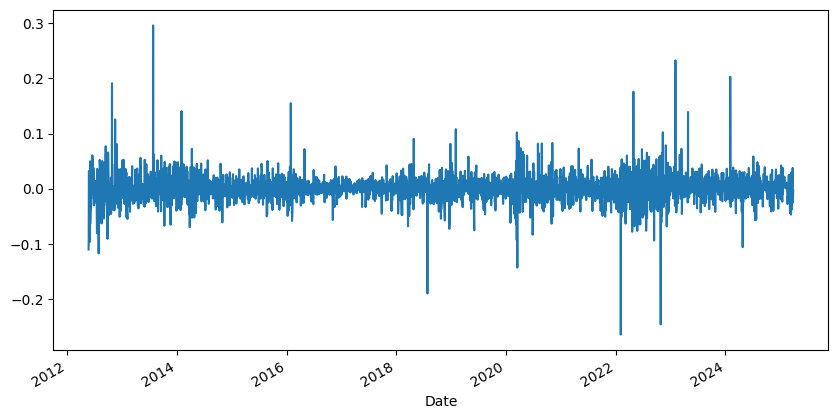

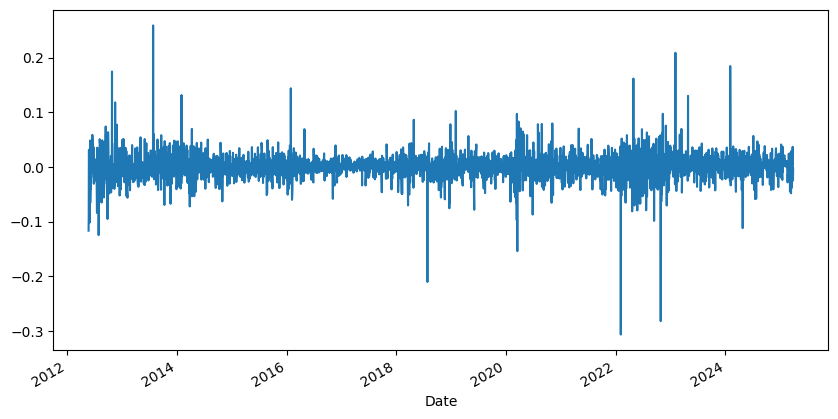

In [11]:
# plot the simple return and log returns for the "facebook" stocks

#definition of simple return 
def simple_return(data):
    simple_return = (data/data.shift(1)) - 1
    return simple_return

#definition of log return 
def log_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return

#plot the simple return and log returns for the stocks
simple_return(facebook_data['Close']).plot(figsize=(10,5))
plt.show()
log_return(facebook_data['Close']).plot(figsize=(10,5))
plt.show()




https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html